#**2. KURAKLIK ANALİZİ**

In [1]:
#Gerekli Kütüphaneler yüklendi. 
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.tsa.stattools as sta  
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
!pip install pymannkendall 
import pymannkendall as mk
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.1 Verinin hazırlanması Ve Görüntülenmesi

In [2]:
minDebi=[2.14,1.62,1.71,1.37,1.62,1.95,1.54,1.71,1.95,2.2,1.95,1.95,1.78,1.7,1.86,2.13,0.099,1.45,1.09,1.07,0.946,1.20,1.79,1.81,1.50]



### 7 Günlük minimumm akımların belirlenmesi

In [3]:
DF=pd.read_csv("concattt.csv") #Günlük Ortalama akışlar bütün yılların tabloları yanyana getirilerek import edildi.
#Her bir kolon, kronolojik olarak sıralı su yılının  aylarına denk gelmektedir.

In [4]:
#su yılı tablosunun bütün ay kolonları alt alta yazıldı.
oneCol=[]
colLength=DF.shape[1]
for k in range(0,colLength):
  oneCol.append(DF.iloc[:,k])

df1 = pd.concat(oneCol, ignore_index=True)
df1=df1.dropna()

df1=pd.DataFrame(df1.values)

In [5]:
Q=[]
#1 haftalık ortalamalar baştan sona bütün seriye uygulandı.
for i in range(len(df1)-7):
  toplam=[]
  for j in range(7):
      toplam.append(df1.iloc[i+j,0])
  Q.append(sum(toplam)/len(toplam))

Q=pd.Series(Q)

#Her bir yılın 7 günlük ortalama  minimum değerleri bulundu.
Q_7=[]
for i in range(25): # 25 yıl için
  Q_7.append(Q[(0+365*i):((358-1)+365*i)].min())



In [6]:
yıl=(range(1988,2013))
tablo = {'Yıl':yıl,
    '1 Günlük Min': minDebi,
        '7 Günlük Min': Q_7
         }
tablo=pd.DataFrame(tablo)
tablo

,Yıl,1 Günlük Min,7 Günlük Min
0,1988,2.140,2.140000
1,1989,1.620,1.620000
2,1990,1.710,1.734286
3,1991,1.370,1.688571
4,1992,1.620,2.200000
5,1993,1.950,1.950000
6,1994,1.540,1.564286
7,1995,1.710,1.710000
8,1996,1.950,2.200000
9,1997,2.200,2.450000


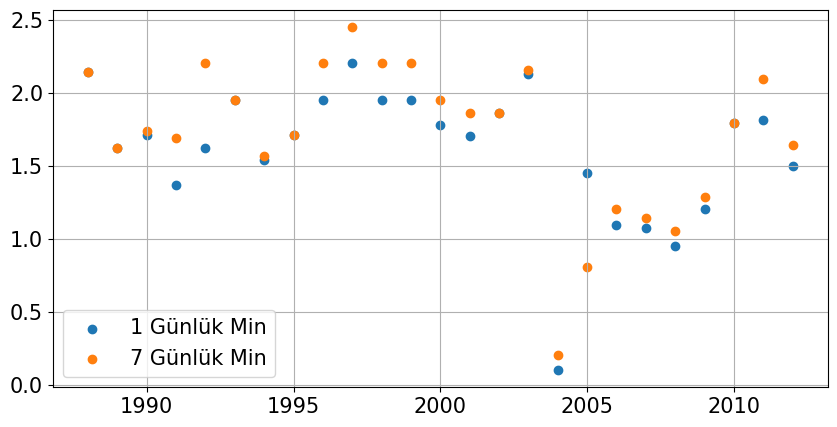

In [7]:
plt.figure(figsize=(10, 5), dpi=100)
plt.rcParams.update({'font.size': 15})
plt.scatter(tablo["Yıl"],tablo['1 Günlük Min'],label='1 Günlük Min');plt.grid()
plt.scatter(tablo['Yıl'],tablo['7 Günlük Min'],label='7 Günlük Min')
plt.legend()

Serini bazı istastistik parametreleri aşağıdaki gibidir:

In [8]:
veri=tablo['7 Günlük Min']
veri.describe()

count    25.000000
mean      1.707846
std       0.520743
min       0.205571
25%       1.564286
50%       1.790000
75%       2.140000
max       2.450000
Name: 7 Günlük Min, dtype: float64

In [9]:
mean=veri.mean()
std=veri.std()
min=veri.min()
max=veri.max()
median=veri.median()
N=len(veri)


##2.2 Frekansın Hesaplanması

In [ ]:
y=pd.Series((25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1))

In [ ]:
mi=tablo['7 Günlük Min'].sort_values( inplace=False, ascending=False)
mii=tablo['1 Günlük Min'].sort_values( inplace=False, ascending=False)
a=0.375
T=(25+1-2*a)/(y-a)
plt.figure(figsize=(10, 5), dpi=100)
plt.rcParams.update({'font.size': 15})
plt.plot(T,mi,label='7 Günlük Min')
plt.plot(T,mii,label='1 Günlük Min')
plt.xlabel("T(yıl)")
plt.ylabel("Debi($m^3$/s) ")
plt.title("Frekans")
plt.legend()



##2.2 Trend Analizi


Zaman serisine Mann-Kendaltrend testi uygulanmıştır. 

In [ ]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
data=veri
mk.original_test(data)# Mann-Kendal Trend Analizi fonksiyonu uygulanmıştır.
trend, h, p, z, Tau, s, var_s, slope, intercept= mk.hamed_rao_modification_test(data,) # çıktı değerleri değişkene atandı.
print("#################MANN-KENDAL TESTİ SONUÇ#################")
print("Trend:",trend) #Trend 
print("Z değeri:",z) #Z Değeri
print("Tau değeri:",Tau)
print("sigma:",np.sqrt(var_s))
print("S:",s)

###2.2.1 İç Bağımlılığın Etkisinin Giderilmesi

Zaman serisinde iç bağımlılık olup olmadığını belirlemek için zaman    serisinin    1 aralıklı  serisel korelasyon  katsayısı testte dikkate alınmalıdır. 

In [ ]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
#Otokorelasyon 1 aralıklı olarak hesaplanmıştır.
def __acf(x, nlags):
    y = x - x.mean()
    n = len(x)
    d = n * np.ones(2 * n - 1)
    
    acov = (np.correlate(y, y, 'full') / d)[n - 1:]
    
    return acov[:nlags+1]/acov[0]
print("Otokorelasyon Katsayısı:",__acf(veri,1)[1],"olarak hesaplandı")  

In [ ]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
data=veri
mk.hamed_rao_modification_test(data,lag=1) #1 zaman aralıklı otokorelasyon dikkate alındı ve test uygulandı.
trend, h, p, z, Tau, s, var_s, slope, intercept= mk.hamed_rao_modification_test(data,lag=1) # çıktı değerleri değişkene atandı.
print("#################MANN-KENDAL TESTİ SONUÇ#################")
print("Trend:",trend) #Trend 
print("Z değeri:",z) #Z Değeri
print("Tau değeri:",Tau)
print("sigma:",np.sqrt(var_s))
print("S:",s)

###2.2.1 İç bağımlılığın etkisinin giderilmesi(Yue,Wang) Ve Man-Kendall Testinin uygulanması

Trend analizinde Yue-Wang metodu kullanılarak trend eğimi ve  otokorelasyon dikkate alınarak oluşturulmuş zaman serisi dikkate alınarak  yeni bir seri oluşturulmuş ve bu seri tekrar teste sokulmuştur.

In [ ]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
data=veri
mk.yue_wang_modification_test(data,lag=1) #yue wang metoduna data sokuldu 
trend, h, p, z, Tau, s, var_s, slope, intercept= mk.yue_wang_modification_test(data,lag=1) # çıktı değerleri değişkene atandı.
print("#################MANN-KENDAL TESTİ SONUÇ#################")
print("Trend:",trend) #Trend 
print("Z değeri:",z) #Z Değeri
print("Tau değeri:",Tau)
print("sigma:",np.sqrt(var_s))
print("S:",s)


## 2.2 Olasılık Dağılımlarının Parametreleri Ve Parametrelerin Tahmini

L momentleri aşağıdaki gibi hesaplanmıştır.

In [ ]:
#İlk önce b0 b1 b2 ve b3 olasılık ağırlıklı momentleri asaıdaki gibi hesaplanır:
def L_moment(Debi):
  N=len(Debi)
  b0=Debi.mean();

  #b1 hesabı
  lmo=0
  i=1
  for j in Debi:
    lmo=lmo+(N-i)*j/(N*(N-1))
    if i==N-1:
      break
    i=i+1
  b1=lmo;

  #b2 hesabı
  lmo=0
  i=1
  for j in Debi:
    lmo=lmo+(N-i)*(N-i-1)*j/(N*(N-1)*(N-2))
    if i==N-2:
      break
    i=i+1
  b2=lmo;

  #b3 hesabı
  lmo=0
  i=1
  for j in Debi:
    lmo=lmo+(N-i)*(N-i-1)*(N-i-2)*j/(N*(N-1)*(N-2)*(N-3))
    if i==N-3:
      break
    i=i+1
  b3=lmo;



  #L-momentleri olasılık ağırlıklı momentler kullanılarak aşağıdaki gibi hesaplanabilir:
  L1=b0;
  L2=2*b1-b0;
  L3=6*b2-6*b1+b0;
  L4=20*b3-30*b2+12*b1-b0;
  Lcv = L2 / L1
  Lcs = L3 / L2
  Lkurt = L4 / L2
  return [L1,L2,L3,L4]
L1=L_moment(tablo['7 Günlük Min'])[0]
L2=L_moment(tablo['7 Günlük Min'])[1]
L3=L_moment(tablo['7 Günlük Min'])[2]
L4=L_moment(tablo['7 Günlük Min'])[3]
Lcv = L2 / L1
Lcs = L3 / L2
Lkurt = L4 / L2
L_m = [L1, L2, L3, L4, Lcv, Lcs, Lkurt]
L_m_name = [ "L1", "L2", "L3", "L4", "Lcv", "Lcs", "Lkurt"]
L_moment = pd.DataFrame(data=L_m, index=L_m_name, columns=["L Momentleri"])
L_moment

 2.2.1 Csx Hesaplanması

In [ ]:
Csx=tablo['7 Günlük Min'].skew()
Csx

## 2.3 Olasılık Dağılımlarının Çizilmesi

In [ ]:
#Olasılık dağılımlarını cizdirmek için fonksiyon yazıldı.
def grafik(D):
  plt.figure(figsize=(10,5))
  plt.plot(df["T(Yıl)"], df[D])
  plt.title(D + " Dağılımı Grafiği")
  plt.ylabel("Debi $m^3/s$")
  plt.xlabel("Dönüş Aralığı (Yıl)")
  return plt.show()

In [ ]:
#Tablo oluşturuldu
df=pd.DataFrame()
T=[2,5,10,25,50,100]
df["T(Yıl)"]=T
df["P"]=1/df["T(Yıl)"]
Z=[]
for i in df["P"]:
  epsilon=epsilon=stats.norm.ppf(q=1-i, loc=0, scale=1)
  Z.append(-1*epsilon)
df["Z"]=Z

### 2 Parametreli Dağılımlar

####Weibul (2P) Dağılımı

In [ ]:

# İki Parametreli Dağılımlar

# Weibull (2P)


k_wei2 =-np.log2(1-L2/L1)
alfa_wei2 =L1/math.gamma(1+k_wei2)
wei2 = alfa_wei2*(-np.log(1-df["P"]))**k_wei2
df["Weibull_2p"] = wei2
grafik("Weibull_2p")

#### Lognormal Dağılım

In [ ]:
# Lognormal Dağılım
log_mean = (np.log(veri)).mean()
log_std = np.log(veri).std()
log2 = np.exp((df["Z"])*log_std+log_mean)

df["Lognormal_2p"]=log2
grafik("Lognormal_2p")

#### Üstel Dağılım

In [ ]:
# üstel dağılım
c = 2.42
x_0 = 2.413502

ustel = (df["P"]**(1/c))*x_0
df["Üstel"] = ustel
grafik("Üstel")

### 3 Parametreli Dağılımlar

#### Lognormal (3P) Dağılım

In [ ]:
# Üç parametreli lognormal #sıkıntılı

x_0_log3 = (max*min-median**2) /(max + min - 2*median)
x_0_log3=0.31 #L momentleri yöntemi ile eşik hesaplandı.
veri_log3 = np.log((veri - x_0_log3))
log3_mean = veri_log3.mean()
log3_std = veri_log3.std() 
Z=[]

log3 =  np.exp((df["Z"])*log3_std+log3_mean)+x_0_log3
df['Lognormal_3p']=log3
grafik('Lognormal_3p')

#### Weibull (3P) Dağılım

In [ ]:
# Üç parametreli Weibull

k_wei3 = 1-(np.log10((mean-min)/std))/(np.log10(0.07+1.73*np.log10(N)))
u_wei3 = min-((mean-min)/(N**k_wei3-1))
alfa_wei3 = (mean - u_wei3) /math.gamma(1+k_wei3)
wei3 = alfa_wei3*(-np.log(1-df["P"]))**k_wei3 + u_wei3
df["Weibull_3p"] = wei3
grafik("Weibull_3p")

#### Pearson Dağılımı

In [ ]:
# Pearson Tip III #Sıkıntı K_p
alfa_pear = (2/Csx)**2
beta_pear = ((std**2) / alfa_pear)**0.5
x_0_pear = mean - alfa_pear*beta_pear
def get_Kp(data,epsilon):
        epsilon=epsilon=stats.norm.ppf(q=i, loc=0, scale=1)
        csx=data.skew()
        Kp=2/csx*(1+csx*epsilon/6-csx**2/36)**3-2/Csx
        return Kp 
K_p=[]
for i in df["P"]:
  kp=get_Kp(veri,i)
  K_p.append(kp)
K_p=pd.Series(K_p)
pear = mean + std*K_p
df["Pearson"] = pear
grafik("Pearson")

#### Log-Pearson Dağılımı

In [ ]:
# Log-Pearson Tip III #Sıkıntı

log_mean=np.log(mean)
log_std=np.log(std)
log_pear = np.exp(log_mean-log_std*K_p)

df["Log-Pearson"] = log_pear
grafik("Log-Pearson")

#### GEV Dağılımı

In [ ]:
# GEV

k_gev = 5.153*(((L3+3*L2)/(2*L2))**2) - 11.73*((L3+3*L2)/(2*L2)) + 6.26
alfa_gev = (k_gev*L2)/((1-2**(-k_gev))*math.gamma(1+k_gev))
u_gev = ((alfa_gev/k_gev) * (math.gamma(1+k_gev)-1)) - L1

gev = abs(u_gev) + alfa_gev*((((-np.log(1-df["P"]))**k_gev)-1)/k_gev)

df["GEV"] = gev

grafik("GEV")

#### Lojistik Dağılımı

In [ ]:
# Logistik

pi = np.pi
k_lgs = - L3/L2
sp = np.sin(pi*k_lgs)
u_lgs = median
alfa_lgs = ((L2/L1)*k_lgs*sp)/(pi*k_lgs*(k_lgs+L2/L1)-(L2/L1)*sp)

lgs = (1-np.exp(k_lgs*np.log(1/df["P"]-1)))/(alfa_lgs/k_lgs) + u_lgs

df["Lojistik"] = lgs

grafik("Lojistik")

Her bir dönüş aralığı için farklı dağılımlarla hesaplanan debi değerleri aşağıdaki gibidir.

## RUN Analizi  

In [ ]:
plt.figure(figsize=(10,5))
med_line = np.array([mean for i in np.arange(len(tablo['Yıl']))])
plt.plot(tablo['Yıl'],veri,label="7 Günlük Min ")
plt.plot(tablo['Yıl'], med_line,label="Ortalama")
plt.fill_between(tablo['Yıl'], veri, med_line,
                 where=(med_line >= veri),
                 alpha=0.8, color='orange', interpolate=True)

plt.ylabel("Debi ($m^3/s$)")
plt.xlabel("Dönüş Aralığı (Yıl)")
plt.legend()

In [26]:
rho_1=0.507 #1 zaman aralıklı otokorelasyon

**$\rho_1$=0.507 ve q=0.1, 0.2, 0.3, 0.4, 0.5 değerleri için s değerleri okunmuştur: s=0.326, 0.435, 0.524, 0.598, 0.667**

In [27]:
def P(l): #Girilen L run uzunluğunun olasılığını verir. Ders Notunda Denklem 2.84
  p=np.exp(-N*df['q']*(1-df['s'])*df['s']**(l-1))*(np.exp(N*df['q']*((1-df['s'])**2)*df['s']**(l-1))-1)
  return p

In [32]:
df=pd.DataFrame()
q=[0.1,0.2,0.3,0.4,0.5]
s=[0.326,0.435,0.524,0.598,0.667] #1 aralıklı korelasyon ve q değerleri ile tablodan okundu.
df['q']=q
df['s']=s
df["x0"] = [(mean - std), (mean-0.84*std), (mean-0.52*std), (mean-0.25*std), mean]
df["L_max"]=[2,5,6,6,6]
df["P(L=2)"]=P(2)
df["P(L=5)"]=P(5)
df["P(L=6)"]=P(6)
df["T"] = (1-df["s"]**df["L_max"])/((1-df["s"])*df["q"]*df["s"]**(df["L_max"]-1)) #Dönüş aralığını veren fonksiyon.

 Her bir q ve s için x0 eşiği belirlenmiştir. Her bir x0 eşik değeri seçildiğinde maksimum run uzunlukları(Lmax) tespit edilmiş ve yukarda elde edilen fonksiyonla olasılıklar hesaplanmıştır ve dönüş aralıkları(T) yukardaki denklemle belirlenmiştir. 

In [33]:
df

,q,s,x0,L_max,P(L=2),P(L=5),P(L=6),T
0,0.1,0.326,1.187102,2,0.258695,0.012666,0.004164,40.674847
1,0.2,0.435,1.270421,5,0.293305,0.053157,0.024089,243.302670
2,0.3,0.524,1.437059,6,0.221204,0.104430,0.060303,173.592415
3,0.4,0.598,1.577660,6,0.147145,0.137291,0.096730,77.603092
4,0.5,0.667,1.707846,6,0.094683,0.138495,0.115909,41.488253


Run Toplamını dağılımının ortalaması ve varyansı(E_D ve Var_D) ders notuna göre hesaplanmıştır. 

In [34]:
pi2 = 2/np.pi #işlem kolaylığı için formüldeki terim bir değişkene atandı
df["Var_D"] = ((1-pi2 + df["s"]*pi2/(1-df["s"]))/(1-df["s"])) + ((1-pi2 )*2*rho_1 / (1-rho_1))*(df["s"]/(1-df["s"]) + (1-df["s"]/((1-rho_1)*(1-df["s"]*rho_1)))) #Run Toplamının Varyansı hesaplandı.
df["E_D"] = ((2/np.pi)**0.5)/(1-df["s"])


In [35]:
df

,q,s,x0,L_max,P(L=2),P(L=5),P(L=6),T,Var_D,E_D
0,0.1,0.326,1.187102,2,0.258695,0.012666,0.004164,40.674847,1.512811,1.183805
1,0.2,0.435,1.270421,5,0.293305,0.053157,0.024089,243.302670,1.987422,1.412185
2,0.3,0.524,1.437059,6,0.221204,0.104430,0.060303,173.592415,2.724080,1.676228
3,0.4,0.598,1.577660,6,0.147145,0.137291,0.096730,77.603092,3.817844,1.984787
4,0.5,0.667,1.707846,6,0.094683,0.138495,0.115909,41.488253,5.637094,2.396050
